In [561]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [562]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

In [563]:
%autoreload
from pipeline import Pipeline, BuilingIdsEnum
from utils import plot_energy_usage, ColumnParam
pipe = Pipeline()

In [564]:
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
print("columns:", list(main_df.columns))
# ['timestamp', 'value_import', 'property_id', 'building', 'area', 'value_export', 'solar_consumption', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']


In [565]:
main_df 

,timestamp,value_import,value_export,solar_consumption,net_consumption,net_consumption_per_sqm,predicted_consumption,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation
0,2023-07-01 00:00:00,27.5,0.0,0.000000,27.500000,0.022936,40.197586,main building,10724,1199,13.6,1.6,251.5,0.5,0.0
1,2023-07-01 01:00:00,27.1,0.0,0.000000,27.100000,0.022602,39.341590,main building,10724,1199,13.2,2.0,246.5,0.4,0.0
2,2023-07-01 02:00:00,26.8,0.0,0.000000,26.800000,0.022352,26.925701,main building,10724,1199,12.3,1.6,260.4,0.3,0.0
3,2023-07-01 03:00:00,25.9,0.0,0.000000,25.900000,0.021601,25.161346,main building,10724,1199,11.9,0.6,285.0,0.9,0.0
4,2023-07-01 04:00:00,26.4,0.0,0.000000,26.400000,0.022018,28.009222,main building,10724,1199,11.9,0.2,295.8,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,2024-09-03 18:00:00,37.4,0.0,0.184148,37.584148,0.031346,42.476562,main building,10724,1199,17.8,2.5,140.8,1.0,1.4
10339,2024-09-03 19:00:00,29.2,0.0,0.157455,29.357455,0.024485,41.309350,main building,10724,1199,17.8,1.8,112.6,1.0,2.5
10340,2024-09-03 20:00:00,28.9,0.0,0.017115,28.917115,0.024118,41.650190,main building,10724,1199,17.7,1.1,75.1,1.0,2.6
10341,2024-09-03 21:00:00,35.0,0.0,0.018016,35.018016,0.029206,40.362083,main building,10724,1199,18.0,3.4,111.0,1.0,2.9


In [12]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="d")

merged_df = merged_df.iloc[1:-1]
plot_energy_usage(merged_df, cols,
                    titel="Daily Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [567]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="w")
merged_df = merged_df.iloc[1:-1]
    
plot_energy_usage(merged_df, cols,
                    titel="Weekly Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [568]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="m")
merged_df = merged_df.iloc[1:-1]
    
plot_energy_usage(merged_df, cols,
                    titel="monthly Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [569]:
merged_df, cols = pipe.select_and_merge_datasets(cols=['net_consumption_per_sqm'], periode="d")
    
plot_energy_usage(merged_df, cols,
                    titel="Daily Energy Usage Comparison per sqm",
                    yaxis_title="Energy [kWh per sqm]",
                    tozeroy=False,
                    dark_mode=True,
                    )

## Renewable Energy Impact

In [570]:
daily_main = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("value_export", "Energy Export"),
    ColumnParam("solar_consumption", "Solar Consumption"),
]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage Main Building",
                  yaxis_title="Energy [kWh]",
                  tozeroy=False,
                  )

In [571]:
# make a grap with 
daily_main = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)
# print net consumption and import together with torzey
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("net_consumption", "Net Consumption"),
]
plot_energy_usage(daily_main, plot_cols,
                    titel="Energy Usage Main Building",
                    yaxis_title="Energy [kWh]",
                    tozeroy=True,
                    )

In [572]:

plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    # ColumnParam("net_consumption", "Net Consumption"),
    ColumnParam("predicted_consumption", "Predicted Consumption"),
]
daily_main = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage actual vs predicted",
                  yaxis_title="Energy [kWh]",
                  tozeroy=True,
                  )

## Feature Analysis
Objective of the projects is to map out the advantigaed of the main building's energy consumtion vs the rest of the buildings.
Main building data columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

Builing A,B,C ['timestamp', 'value_import', 'net_consumption', 'net_consumption_per_sqm', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

example use:

monthly_a = pipe.get_monthly_consumption(BuilingIdsEnum.A)

for eks
daily_main = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)

plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    # ColumnParam("net_consumption", "Net Consumption"),
    ColumnParam("predicted_consumption", "Predicted Consumption"),
]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage actual vs predicted",
                  yaxis_title="Energy [kWh]",
                  tozeroy=True,
                  )

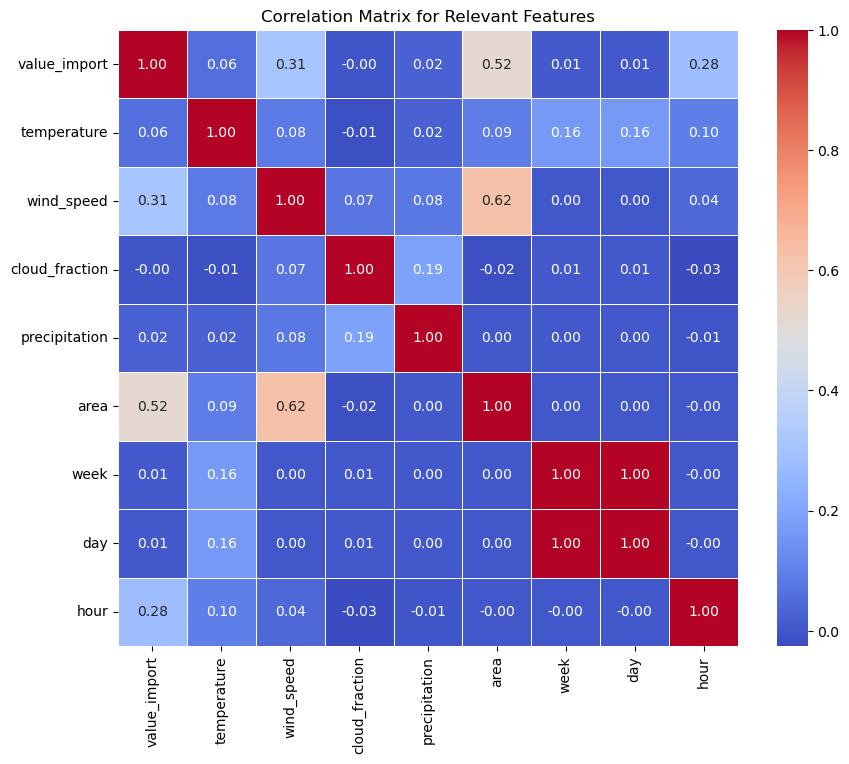

In [573]:
df_a = pipe.get_data(BuilingIdsEnum.A)
df_b = pipe.get_data(BuilingIdsEnum.B)
df_c = pipe.get_data(BuilingIdsEnum.C)

merged_df = pd.concat([df_a, df_b, df_c])
# Add 'week' and 'day' columns
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df['day'] = merged_df['timestamp'].dt.dayofyear
merged_df['week'] = merged_df['timestamp'].dt.isocalendar().week

relevant_columns = [
    'value_import', 
    'temperature', 'wind_speed', 
    'cloud_fraction', 'precipitation',
    'area', "week", "day", "hour"
]
df_corr = merged_df[relevant_columns]

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Relevant Features')
plt.show()



### key takeaways:

- **Building Size (Area) and Energy Import:** The correlation matrix shows a strong relationship between `area` and `value_import`, indicating that larger buildings generally require more energy. This is expected, as larger spaces have greater heating, cooling, and operational demands.
- **Wind Speed Influence:** The moderate positive correlation between `wind_speed` and `value_import` suggests that wind may have a tangible impact on energy use. This seems odd and should be investigated further.

- **Time-Based Influence:** The relatively weak correlation between `value_import` and time-based features (week, day) suggests minimal impact, while the moderate correlation with `hour` indicates potential fluctuations in energy consumption over the course of a day.

- **Wind and Area Interaction:** The correlation between `wind_speed` and `area` does not make sense, even though it appears to be strong.

### Next up:

- **Further Analysis on Hourly Patterns:** Since there is a noticeable correlation with `hour`, it may be valuable to explore energy consumption patterns across different hours of the day to identify peak usage periods.
- **Investigate the correlation of feature for the different buildings:** The correlation matrix should be analyzed for each building to identify unique relationships and potential areas for optimization.

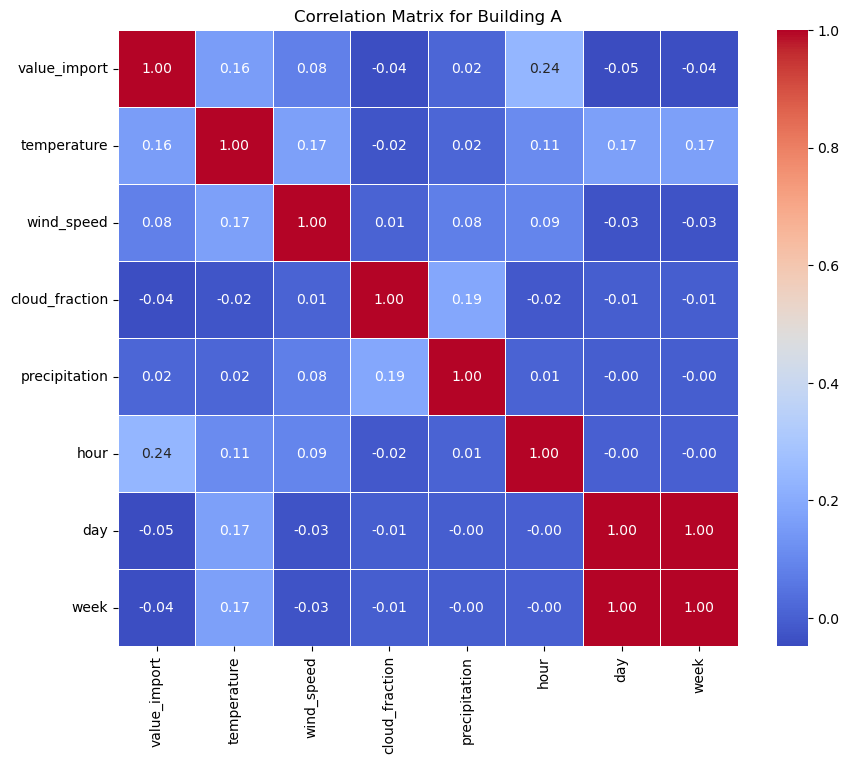

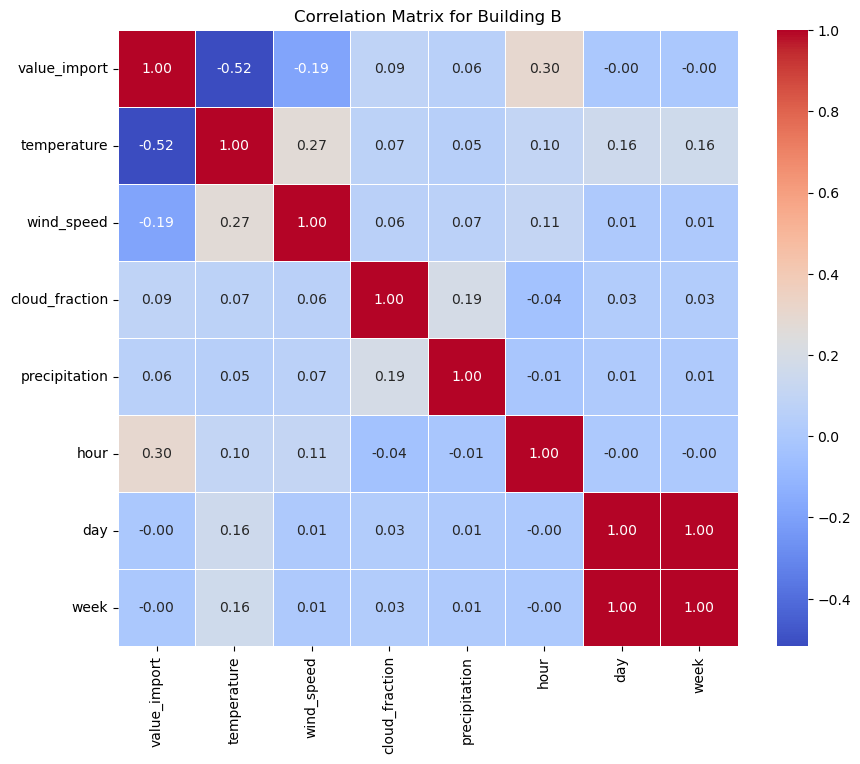

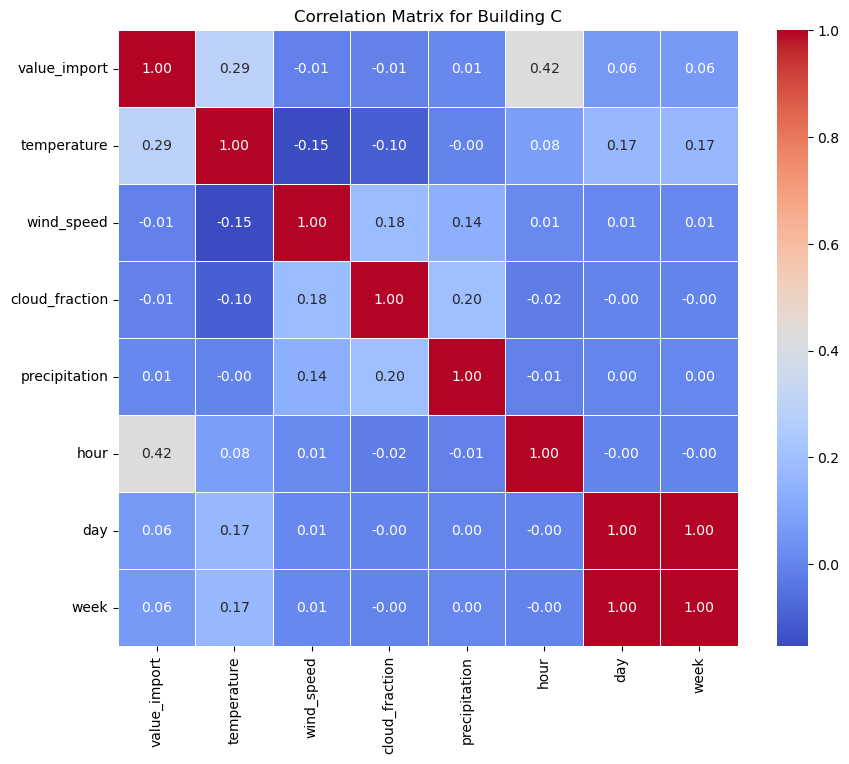

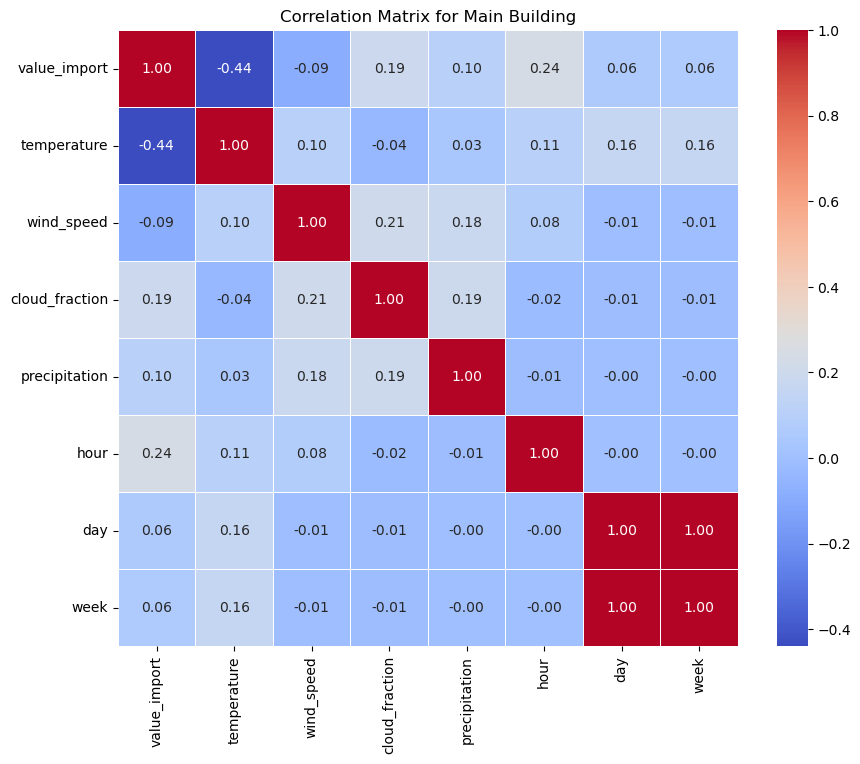

In [574]:
df_a = pipe.get_data(BuilingIdsEnum.A)
df_b = pipe.get_data(BuilingIdsEnum.B)
df_c = pipe.get_data(BuilingIdsEnum.C)
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
dataframes = {
    'Building A': df_a,
    'Building B': df_b,
    'Building C': df_c,
    'Main Building': main_df
}
# Relevant columns for correlation analysis
relevant_columns = [
    'value_import', 
    'temperature', 'wind_speed', 
    'cloud_fraction', 'precipitation',
]

# Loop through each dataframe and create correlation matrix
for name, df in dataframes.items():
    # Ensure 'timestamp' is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Add 'hour', 'day', and 'week' columns
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.dayofyear
    df['week'] = df['timestamp'].dt.isocalendar().week

    # Select relevant columns for correlation
    df_relevant = df[relevant_columns + ['hour', 'day', 'week']]

    # Compute the correlation matrix
    corr_matrix = df_relevant.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix for {name}')
    plt.show()


### Correlation Matrix Interpretation
The hour and temperature are the features most relevant for the energy consumption of the buildings. 
However the buildings have different correlations with the features. The A building has the least correlation with the features. The B building has the correlation most similar to the main building. The C building has the most correlation with hourly usage while builing B has the highest correlation with temperature.

Perhaps the data from the B building is best for predicting the main building's energy consumption. Maybe it should be weighted more?


## Anomaly Detection

In [575]:
daily_a = pipe.get_daily_consumption(BuilingIdsEnum.A)
# select juli 2024
daily_a_selected = daily_a[(daily_a['timestamp'] >= '2024-01-01') & (daily_a['timestamp'] < '2024-08-01')]
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
]
plot_energy_usage(daily_a_selected, plot_cols,
                  titel="Daily Energy Usage A Building",
                  yaxis_title="Energy [kWh]",
                  tozeroy=False,
                  )

### Anomaly Detection Results
There seems to be something off in the start of juli 2024. This could be due to a data error or a real anomaly. We want to avoid using this data when training the model.

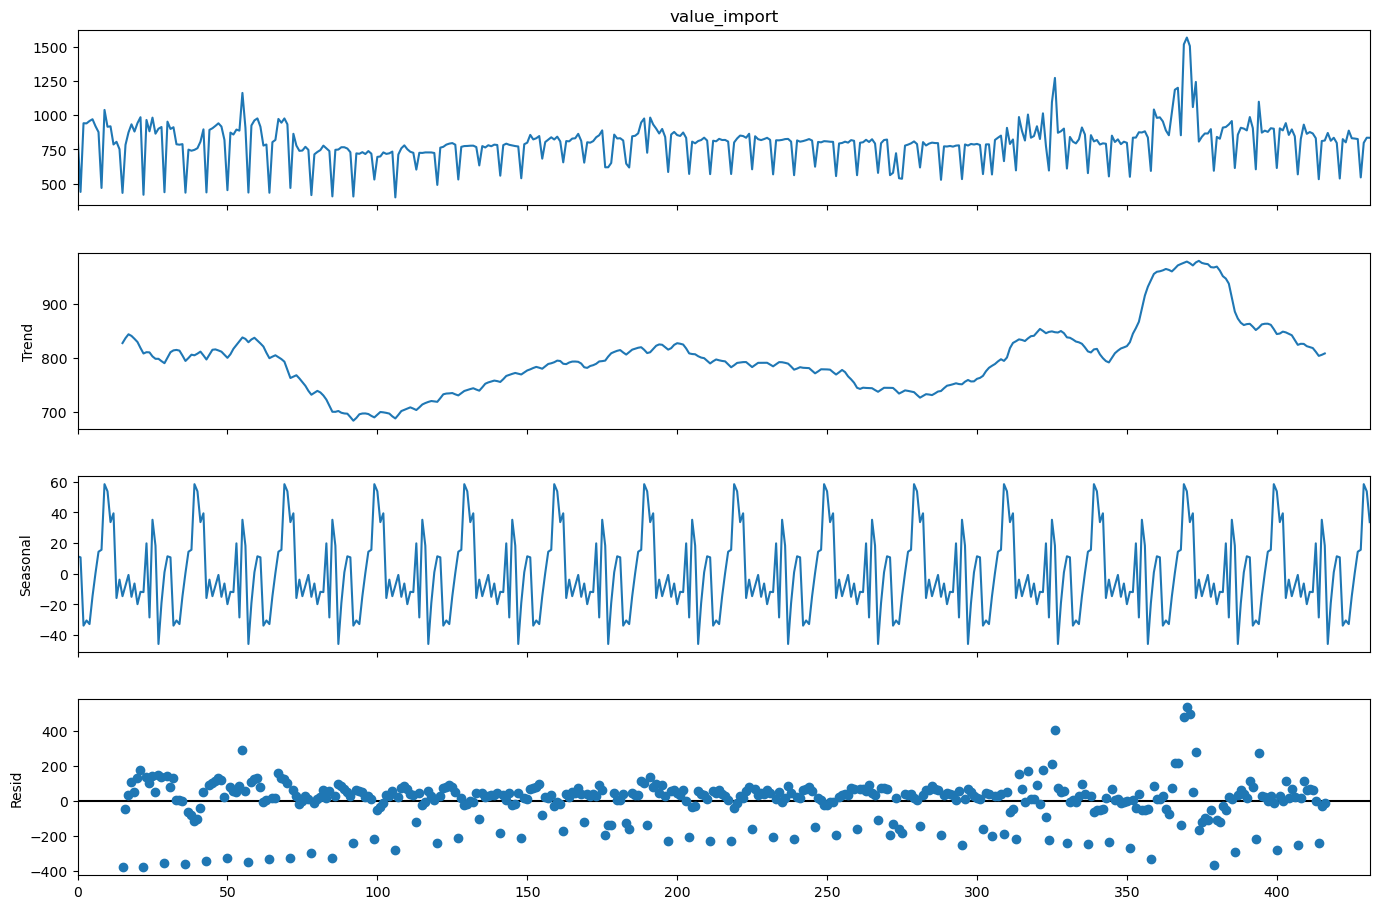

In [576]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(daily_a['value_import'], model='additive', period=30)  # Assuming monthly seasonality

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()


In [577]:
import numpy as np
from scipy import stats

# Calculate Z-scores
daily_a['z_score'] = np.abs(stats.zscore(daily_a['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_a['anomaly_z'] = daily_a['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_a['anomaly_z'].sum()}")

# show anonomalies
anonomalies_df = daily_a[daily_a['anomaly_z']]
anonomalies_df



Number of anomalies detected by Z-Score: 5


,timestamp,value_import,net_consumption,net_consumption_per_sqm,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,hour,day,week,z_score,anomaly_z
326,2024-05-22,1271.2,1271.2,1.089289,building A,10703,1167,17.604167,2.458333,278.8,0.391667,0.000000,0,143,21,3.247965,True
369,2024-07-04,1515.8,1515.8,1.298886,building A,10703,1167,12.295833,2.166667,189.4,0.762500,0.341667,0,186,27,4.931505,True
370,2024-07-05,1565.4,1565.4,1.341388,building A,10703,1167,11.483333,1.166667,104.0,0.612500,0.000000,0,187,27,5.272894,True
371,2024-07-06,1503.8,1503.8,1.288603,building A,10703,1167,12.575000,1.387500,302.9,0.783333,0.150000,0,188,27,4.848911,True
373,2024-07-08,1242.0,1242.0,1.064267,building A,10703,1167,15.079167,1.545833,152.7,0.279167,0.000000,0,190,28,3.046986,True


Lets look at dataset b, c and main  as well and identify if the anomaly is present in all datasets defined by the z-score.

In [578]:
daily_main_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)
daily_main_anomalies['z_score'] = np.abs(stats.zscore(daily_main_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_main_anomalies['anomaly_z'] = daily_main_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_main_anomalies['anomaly_z'].sum()}")



Number of anomalies detected by Z-Score: 0


In [579]:
daily_b_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.B)
daily_b_anomalies['z_score'] = np.abs(stats.zscore(daily_b_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_b_anomalies['anomaly_z'] = daily_b_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_b_anomalies['anomaly_z'].sum()}")
anonomalies_df = daily_b_anomalies[daily_b_anomalies['anomaly_z']]
anonomalies_df



Number of anomalies detected by Z-Score: 5


,timestamp,value_import,net_consumption,net_consumption_per_sqm,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,hour,day,week,z_score,anomaly_z
188,2024-01-05,1102.48,1102.48,1.006831,building B,4462,1095,-25.829167,0.391667,163.1,0.087500,0.0,0,5,1,3.352499,True
189,2024-01-06,1123.76,1123.76,1.026265,building B,4462,1095,-27.120833,0.620833,169.5,0.062500,0.0,0,6,1,3.520223,True
190,2024-01-07,1075.44,1075.44,0.982137,building B,4462,1095,-24.754167,0.400000,196.1,0.000000,0.0,0,7,1,3.139376,True
191,2024-01-08,1116.40,1116.40,1.019543,building B,4462,1095,-23.158333,0.454167,62.4,0.395833,0.0,0,8,2,3.462213,True
198,2024-01-15,1584.56,1584.56,1.447087,building B,4462,1095,-13.891667,0.887500,2.9,0.270833,0.0,0,15,3,7.152142,True


In [580]:
daily_c_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.C)
daily_c_anomalies['z_score'] = np.abs(stats.zscore(daily_c_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_c_anomalies['anomaly_z'] = daily_c_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_c_anomalies['anomaly_z'].sum()}")



Number of anomalies detected by Z-Score: 0


## Futher analysis points
- **sum up energy savings:** The energy savings for each building should be calculated and compared to identify the most efficient building.
- **Try to figure out how much money they save:** The energy savings can be converted into monetary savings based on the energy costs to provide a more tangible understanding of the benefits.

- **KPIs for energy efficiency:** Key performance indicators (KPIs) can be established to monitor and evaluate the energy efficiency of each building over time. These KPIs can help identify areas for improvement and track progress towards sustainability goals.

- **Analysis of peak energy consumption:** Identifying peak energy consumption periods can help optimize energy usage and reduce costs. Strategies such as load shifting, demand response, and energy storage can be implemented to manage peak demand effectively.